In [18]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
# load pima indians dataset
dataset = pd.read_csv("D:/Cours Dauphine/S2/AFD/projet/codeSource/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]
X, X_test, Y, Y_test = train_test_split(X, Y)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)


In [11]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

#encoder Y_test
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y_test)
#converti le Y de chaine de caractères à numérique
Y_test_numerique = encoder.transform(Y_test)

print(Y_test_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_encode_binaire = np_utils.to_categorical(Y_test_numerique)#6

print(y_test_encode_binaire)

[0 3 0 ..., 1 3 2]
[1 3 2 ..., 2 2 1]
[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 ..., 
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


In [12]:
kmeans = KMeans(n_clusters=6,max_iter=400,init = 'k-means++',tol=0.00001,n_init=20,random_state=50)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 2 0 ..., 0 2 1]


In [6]:
idk=np.argsort(kmeans.labels_)
print(pd.DataFrame(X))

             0         1         2         3         4         5         6   \
0     -0.330507 -0.179383 -0.176711 -0.294168 -0.315473 -0.123883  0.058598   
1      0.230412 -0.275262 -0.264048 -0.261020  0.070136 -0.496695  0.072016   
2     -0.330507 -0.179383 -0.100291 -0.145002 -0.958153 -0.123883  0.512593   
3      1.352249  0.851309  0.980508  1.114623  0.584280 -0.382545  0.744840   
4     -1.452345 -1.162136 -1.044625 -1.023424 -1.472297  0.655398  0.917173   
5     -1.171886 -1.090227 -1.246592 -1.172590 -1.215225 -0.160129 -3.319339   
6     -0.330507 -1.329923 -1.295719 -1.321756 -0.572545 -0.993779 -1.141245   
7     -0.610967 -1.329923 -1.290261 -1.321756 -1.086689 -0.930349 -0.997635   
8      0.230412 -0.107475  0.156262  0.219626 -0.315473 -0.406081  1.565262   
9     -0.050048  0.012373 -0.187628 -0.078706  0.969888 -0.190333 -0.940190   
10     0.230412  0.156191 -0.012954 -0.062132 -0.315473 -0.263688 -0.665063   
11     0.230412  1.019096  0.816750  0.849439 -0.186

In [17]:
#reduction des dimensions pour affichage 
randomized_pca = RandomizedPCA(n_components=2)
reduced_data_rpca = randomized_pca.fit_transform(X)
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(X)

C:\Users\PICOS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


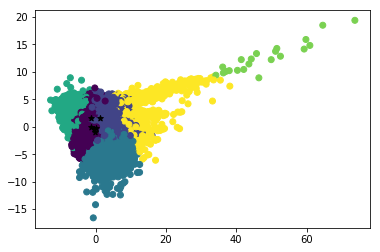

In [20]:
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],marker='*', c='black')
#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()